In [120]:

%pylab inline
import pandas
import seaborn


Populating the interactive namespace from numpy and matplotlib


In [121]:
data = pandas.read_csv('folder/uber-raw-data-aug14.csv')

In [122]:
data.tail()

,Date/Time,Lat,Lon,Base
829270,8/31/2014 23:55:00,40.7552,-73.9753,B02764
829271,8/31/2014 23:55:00,40.7552,-73.9753,B02764
829272,8/31/2014 23:55:00,40.7617,-73.9788,B02764
829273,8/31/2014 23:59:00,40.7395,-73.9889,B02764
829274,8/31/2014 23:59:00,40.7270,-73.9802,B02764


In [123]:
data['Date/Time'] = data['Date/Time'].map(pandas.to_datetime)

In [124]:
data.tail()

,Date/Time,Lat,Lon,Base
829270,2014-08-31 23:55:00,40.7552,-73.9753,B02764
829271,2014-08-31 23:55:00,40.7552,-73.9753,B02764
829272,2014-08-31 23:55:00,40.7617,-73.9788,B02764
829273,2014-08-31 23:59:00,40.7395,-73.9889,B02764
829274,2014-08-31 23:59:00,40.7270,-73.9802,B02764


In [125]:
def get_dom(dt):
    return dt.day

data['dom'] = data['Date/Time'].map(get_dom)


In [126]:
def get_weekday(dt):
    return dt.weekday()

data['weekday'] = data['Date/Time'].map(get_weekday)

def get_hour(dt):
    return dt.hour

data['hour'] = data['Date/Time'].map(get_hour)

data.tail()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
829270,2014-08-31 23:55:00,40.7552,-73.9753,B02764,31,6,23
829271,2014-08-31 23:55:00,40.7552,-73.9753,B02764,31,6,23
829272,2014-08-31 23:55:00,40.7617,-73.9788,B02764,31,6,23
829273,2014-08-31 23:59:00,40.7395,-73.9889,B02764,31,6,23
829274,2014-08-31 23:59:00,40.7270,-73.9802,B02764,31,6,23


Text(0.5, 1.0, 'Frequency by DoM - uber - Aug 2014')

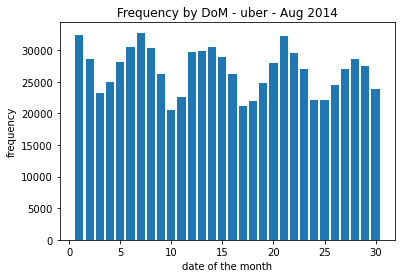

In [127]:
hist(data.dom, bins=30, rwidth=.8, range=(0.5, 30.5))
xlabel('date of the month')
ylabel('frequency')
title('Frequency by DoM - uber - Aug 2014')

In [128]:
def count_rows(rows):
    return len(rows)

by_date = data.groupby('dom').apply(count_rows)
by_date

dom
1     32353
2     28678
3     23146
4     24952
5     28094
6     30495
7     32759
8     30411
9     26286
10    20584
11    22632
12    29646
13    29788
14    30457
15    28974
16    26234
17    21209
18    21956
19    24834
20    27955
21    32304
22    29512
23    27097
24    22036
25    22093
26    24550
27    27018
28    28597
29    27424
30    23930
31    23271
dtype: int64

In [129]:
x = 8
by_date[x]
acc = ((100/32759) * by_date[x])
acc = 100 - acc
print(str(acc) + "%")

7.167495955309988%


In [130]:
by_date_sorted = by_date.sort_values()
by_date_sorted

dom
10    20584
17    21209
18    21956
24    22036
25    22093
11    22632
3     23146
31    23271
30    23930
26    24550
19    24834
4     24952
16    26234
9     26286
27    27018
23    27097
29    27424
20    27955
5     28094
28    28597
2     28678
15    28974
22    29512
12    29646
13    29788
8     30411
14    30457
6     30495
21    32304
1     32353
7     32759
dtype: int64

(array([14471., 10105., 10376., 11774., 16525., 24907., 34064., 34566.,
        30195., 30706., 31778., 32106., 35764., 40644., 48197., 53481.,
        57122., 55390., 53008., 51674., 51354., 46008., 33609.,     0.]),
 array([ 0.5       ,  1.47916667,  2.45833333,  3.4375    ,  4.41666667,
         5.39583333,  6.375     ,  7.35416667,  8.33333333,  9.3125    ,
        10.29166667, 11.27083333, 12.25      , 13.22916667, 14.20833333,
        15.1875    , 16.16666667, 17.14583333, 18.125     , 19.10416667,
        20.08333333, 21.0625    , 22.04166667, 23.02083333, 24.        ]),
 <a list of 24 Patch objects>)

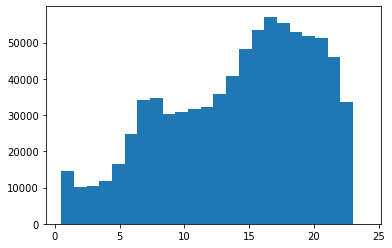

In [131]:
hist(data.hour, bins=24, range=(.5, 24))

In [132]:
by_hour = data.groupby('hour').apply(count_rows)
by_hour

hour
0     21451
1     14471
2     10105
3     10376
4     11774
5     16525
6     24907
7     34064
8     34566
9     30195
10    30706
11    31778
12    32106
13    35764
14    40644
15    48197
16    53481
17    57122
18    55390
19    53008
20    51674
21    51354
22    46008
23    33609
dtype: int64

In [133]:
y = 18
by_hour[y]
accy = ((100/57122) * by_hour[y])
accy = 100 - accy
print(str(accy) + "%")

3.032106718952406%


In [134]:
by_hour_sorted = by_hour.sort_values()
by_hour_sorted

hour
2     10105
3     10376
4     11774
1     14471
5     16525
0     21451
6     24907
9     30195
10    30706
11    31778
12    32106
23    33609
7     34064
8     34566
13    35764
14    40644
22    46008
15    48197
21    51354
20    51674
19    53008
16    53481
18    55390
17    57122
dtype: int64

([<matplotlib.axis.XTick at 0x19d3e922580>,
 [Text(0, 0, 'Mon'),
  Text(0, 0, 'Tue'),
  Text(0, 0, 'Wed'),
  Text(0, 0, 'Thu'),
  Text(0, 0, 'Fri'),
  Text(0, 0, 'Sat'),
  Text(0, 0, 'Sun')])

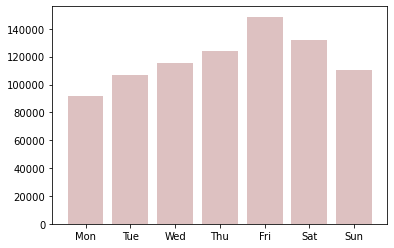

In [135]:
hist(data.weekday, bins=7, range =(-.5,6.5), rwidth=.8, color='#AA6666', alpha=.4)
xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())

In [136]:
def count_rows(rows):
    return len(rows)

by_weekday = data.groupby('weekday').apply(count_rows)
by_weekday

weekday
0     91633
1    107124
2    115256
3    124117
4    148674
5    132225
6    110246
dtype: int64

In [137]:
z = 3
by_weekday[z]
accz = ((100/148674) * by_weekday[z])
accz = 100 - accz
print(str(accz) + "%")

16.517346677966557%


In [138]:
by_weekday_sorted = by_weekday.sort_values()
by_weekday_sorted

weekday
0     91633
1    107124
6    110246
2    115256
3    124117
5    132225
4    148674
dtype: int64

In [139]:
by_cross = data.groupby('weekday hour'.split()).apply(count_rows).unstack()
by_cross

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,1094,684,560,1186,1836,2786,4098,5357,5060,3844,...,4572,5251,5974,6508,6135,5773,5586,4775,3559,2178
1,1115,733,508,772,1337,2270,3975,5614,5350,4196,...,5501,6361,7426,8297,7999,7273,7300,6630,4951,2903
2,1649,967,665,967,1483,2611,4546,6161,5955,4575,...,5312,6495,7682,8520,7904,7507,7736,7623,5602,3305
3,1800,1055,745,1099,1633,2497,4069,5690,5454,4536,...,5809,6936,7818,8592,8563,8512,8549,8762,8063,5736
4,3536,2064,1331,1660,2162,3101,4651,6601,6753,5512,...,7197,8803,9401,9655,9484,9227,8321,9075,9488,8056
5,5828,4209,2857,2293,1793,1801,2089,2541,3228,3863,...,6276,7478,7884,8291,8846,8521,8192,8830,9506,8166
6,6429,4759,3439,2399,1530,1459,1479,2100,2766,3669,...,5977,6873,7296,7259,6459,6195,5990,5659,4839,3265


In [140]:
weekday = 4
hour = 22
accwh = ( 100/148674)*(by_cross.iat[weekday, hour])
accwh = 100 - accwh
print(str(accwh) + "%")


93.61825201447462%


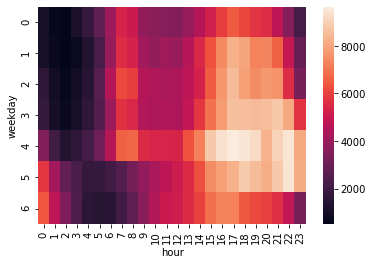

In [141]:
seaborn.heatmap(by_cross)

''

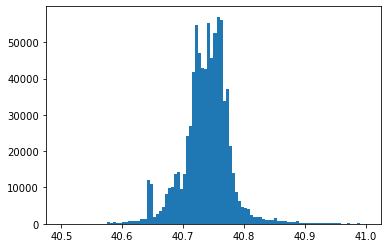

In [142]:
hist(data['Lat'], bins=100, range = (40.5, 41))
;

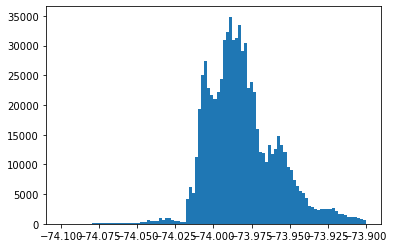

In [143]:
hist(data['Lon'], bins=100, range = (-74.1, -73.9));

''

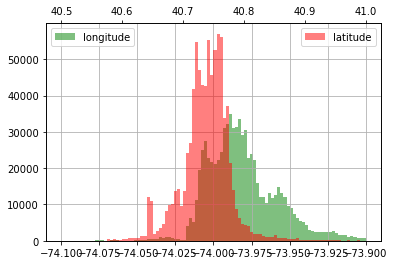

In [144]:
hist(data['Lon'], bins=100, range = (-74.1, -73.9), color='g', alpha=.5, label = 'longitude')
grid()
legend(loc='upper left')
twiny()
hist(data['Lat'], bins=100, range = (40.5, 41), color='r', alpha=.5, label = 'latitude')
legend(loc='best')
;

(40.7, 41.0)

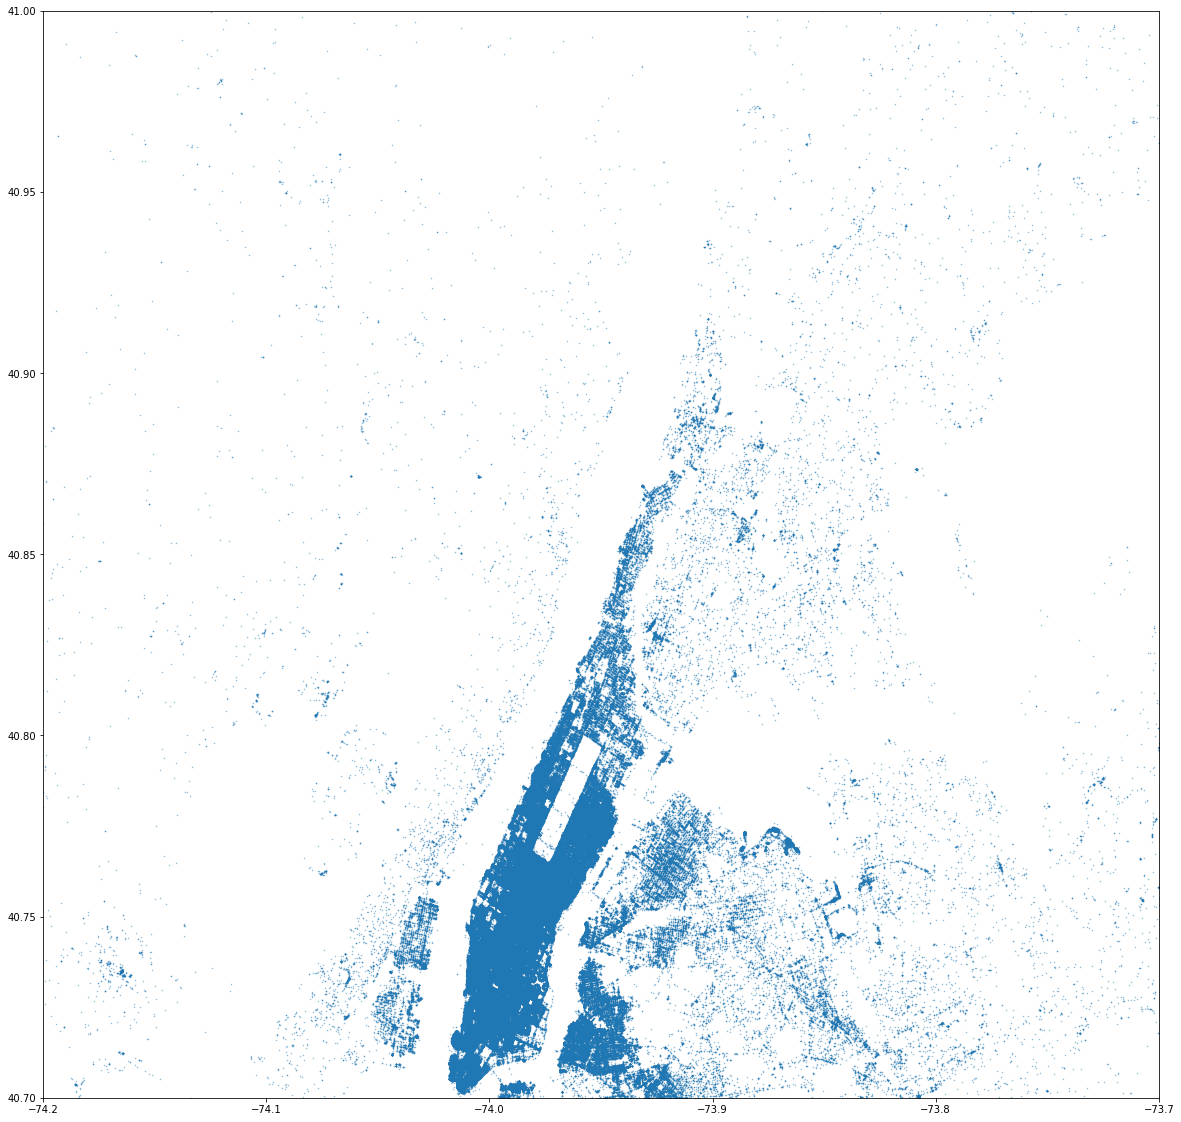

In [145]:
figure(figsize=(20, 20))
plot(data['Lon'], data['Lat'], '.', ms=1, alpha=.5)
xlim(-74.2, -73.7)
ylim(40.7, 41)